# Deep learning fundatmental

## Colab environment

In [1]:
!python --version

Python 3.7.12


In [2]:
!pip list \ grep tensor

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl

In [3]:
!pip list \ torch

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl

In [4]:
!nvidia-smi

Mon Dec 27 09:55:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import numpy as np

In [6]:
X = np.random.rand(3,2)
X

array([[0.61610956, 0.72297543],
       [0.38906023, 0.39991669],
       [0.73994449, 0.26273565]])

In [7]:
X[X > 0.5] = 1
X

array([[1.        , 1.        ],
       [0.38906023, 0.39991669],
       [1.        , 0.26273565]])

In [8]:
import matplotlib.pyplot as plt

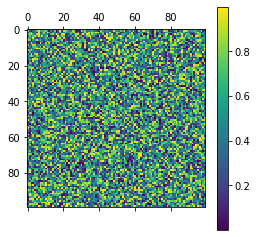

In [9]:
X = np.random.rand(100,100)
plt.matshow(X)
plt.colorbar()

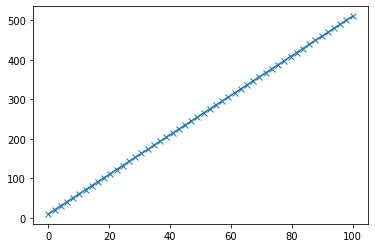

In [10]:
x = np.linspace(0, 100)
y = x * 5 + 10

plt.plot(x, y, 'x-')

## Basic regression with a linear model 

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


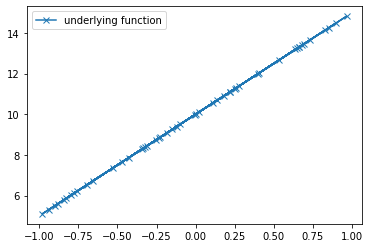

In [11]:
n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d)) # -1~1 사이의 uniform distrubution 을 따르는 난수를 n, d 차원으로 만금

weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

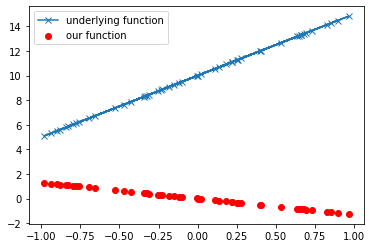

In [12]:
class Linear:
  def __init__(self, num_input, num_output=1):
    # 다른 input 사이즈를 다루기 위해서는 init 부분이 매우 중요하다.
    self.weights = np.random.randn(num_input, num_output) * np.sqrt(2. / num_input)
    self.bias = np.zeros((1))

  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', label='our function')
plt.legend()

## Basic loss function: MSE

In [13]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true-y_pred) ** 2).mean()

loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 108.31757761740793


## Add back propagation 

In [14]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()

  def backward(self):
     n = len(self.y_true)
     self.gradient = 2. * (self.y_pred - self.y_true) / n
     return self.gradient

class Linear:
  def __init__(self, input_dim: int, num_hidden: int  = 1):
    self.weights = np.random.randn(input_dim, num_hidden) - 0.5
    self.bias = np.random.randn(num_hidden) - 0.5

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient): 
    self.weights_gradient = self.x.T @ gradient # 해당 weight를 업데이트하기 위한 gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T # 연쇄법칙을 위한 gradient
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient


In [15]:
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

113.7683636011877
74.51204976391608


## Train using gradient descent

Epoch 0, loss 140.86516295619285
Epoch 5, loss 20.846115958604123
Epoch 10, loss 5.203180422147852
Epoch 15, loss 2.0843669900110005
Epoch 20, loss 1.0077560489148634
Epoch 25, loss 0.5109052275639702
Epoch 30, loss 0.26170264919308683
Epoch 35, loss 0.13434375914495486
Epoch 40, loss 0.06899588109644533
Epoch 45, loss 0.03543803958120244
Epoch 50, loss 0.018202234841032405
Epoch 55, loss 0.009349351892828995


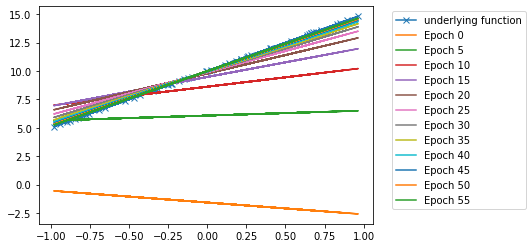

In [16]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 60
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')
  
  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

## 2-dimensional inputs work

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


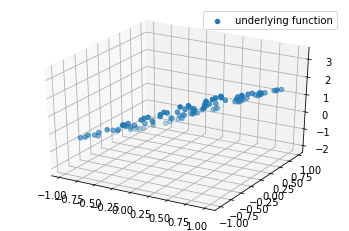

In [17]:
n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:,0], x[:,1], y_pred, label='our_function')
  plt.legend()

plot_3d(x, y_true)

14.799516960264043


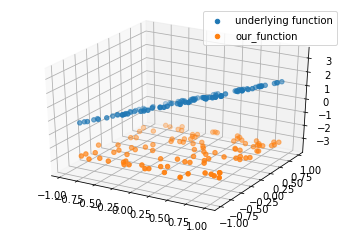

In [18]:
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 14.799516960264043
Epoch 1, loss 9.54721815391481
Epoch 2, loss 6.20571116622835
Epoch 3, loss 4.073924191927545
Epoch 4, loss 2.7087454422087536
Epoch 5, loss 1.8300152870551236
Epoch 6, loss 1.2605215878183333
Epoch 7, loss 0.8881007740009872
Epoch 8, loss 0.6416996543782418
Epoch 9, loss 0.4762541934715244
Epoch 10, loss 0.3631368198663108
Epoch 11, loss 0.2841207725674777
Epoch 12, loss 0.2275658835824305
Epoch 13, loss 0.18600755819741707
Epoch 14, loss 0.15463218206397372
Epoch 15, loss 0.13031257056540071
Epoch 16, loss 0.11099731222519313
Epoch 17, loss 0.0953237928783516
Epoch 18, loss 0.0823726448572824
Epoch 19, loss 0.07151165438500087
Epoch 20, loss 0.06229629095222604
Epoch 21, loss 0.05440610603497561
Epoch 22, loss 0.04760388150670262
Epoch 23, loss 0.041709230228864094
Epoch 24, loss 0.03658139810282623
Epoch 25, loss 0.03210794231958681
Epoch 26, loss 0.02819717767854817
Epoch 27, loss 0.02477305251694354
Epoch 28, loss 0.021771602750204927
Epoch 29, los

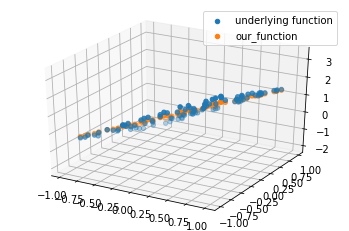

In [19]:
from typing import Callable

def fit(x:np.ndarray, y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)
  
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=30)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer perceptron

x : (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


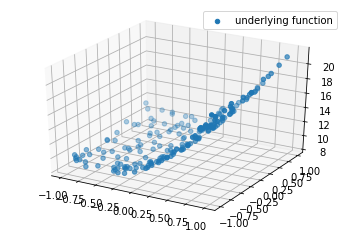

In [20]:
# make non-linear data

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([10])

y_true = (x ** 2) @ weights_true + x @ weights_true  + bias_true
print(f"x : {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}")

plot_3d(x, y_true)

Epoch 0, loss 206.72983107993088
Epoch 1, loss 135.4428854396045
Epoch 2, loss 89.63061294298294
Epoch 3, loss 60.11050962753925
Epoch 4, loss 41.02021996125102
Epoch 5, loss 28.615739730430207
Epoch 6, loss 20.504803850028402
Epoch 7, loss 15.157851797898807
Epoch 8, loss 11.596045476757775
Epoch 9, loss 9.192222097545542
Epoch 10, loss 7.543886138201839
Epoch 11, loss 6.392155483772854
Epoch 12, loss 5.570023635339437
Epoch 13, loss 4.969325249440066
Epoch 14, loss 4.519635418012494
Epoch 15, loss 4.174784386922038
Epoch 16, loss 3.9042329443535446
Epoch 17, loss 3.687551014158652
Epoch 18, loss 3.5108781373704754
Epoch 19, loss 3.364650316862552
Epoch 20, loss 3.2421365617304554
Epoch 21, loss 3.138493610371477
Epoch 22, loss 3.0501526736746207
Epoch 23, loss 2.9744192696514444
Epoch 24, loss 2.9092101257534035
Epoch 25, loss 2.8528785120878903
Epoch 26, loss 2.804096855408775
Epoch 27, loss 2.7617766534709536
Epoch 28, loss 2.7250128479150963
Epoch 29, loss 2.69304437947634
Epoch 3

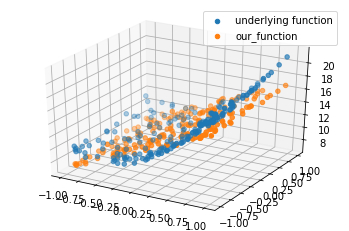

In [21]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

## Add non-linearity: ReLu

In [22]:
class Relu:
  def __call__(self, input_):
    self.input_ = input_
    self.output = np.clip(self.input_, 0, None)
    return self.output

  def backward(self, output_gradient):
    self.input_gradient = (self.input_ > 0) * output_gradient
    return self.input_gradient

relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


175.3346959056023


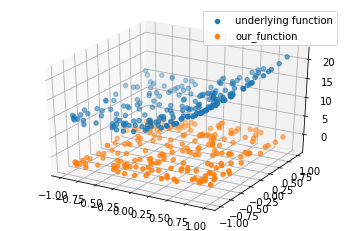

In [23]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)

  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)

    return linear1_gradient

  def update(self, lr): # relu는 weight가 없으므로 update 필요 x
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [24]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

217.77508867284143
73.21698591967156


Epoch 0, loss 73.21698591967156
Epoch 1, loss 48.240776308665424
Epoch 2, loss 130.99292864077736
Epoch 3, loss 133.0083056631267
Epoch 4, loss 87.80776011128187
Epoch 5, loss 59.69887404948753
Epoch 6, loss 42.002206775043334
Epoch 7, loss 30.944685367716634
Epoch 8, loss 24.07962416640596
Epoch 9, loss 19.780627657794973
Epoch 10, loss 17.01033984867706
Epoch 11, loss 15.158896901507738
Epoch 12, loss 13.882499893379622
Epoch 13, loss 12.983894421221544
Epoch 14, loss 12.343452023069364
Epoch 15, loss 11.881900268373952
Epoch 16, loss 11.543385640680231
Epoch 17, loss 11.291574979858588
Epoch 18, loss 11.098732323231362
Epoch 19, loss 10.944465364647888


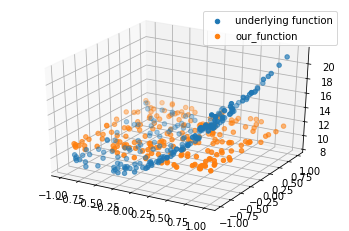

In [25]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, model(x))

tensor(157.8383, grad_fn=<MseLossBackward0>)


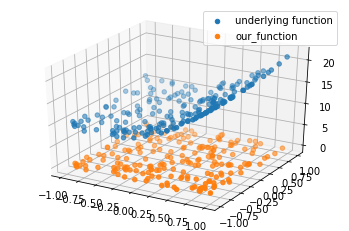

In [35]:
import torch
import torch.nn as nn

class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)

  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float() # numpy array 를 텐서로 변환
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
plot_3d(x_tensor, y_true_tensor, y_pred_tensor.detach())

In [36]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(157.8383, grad_fn=<MseLossBackward0>)
tensor(148.5555, grad_fn=<MseLossBackward0>)


tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0566, grad_fn=<MseLossBackward0>)
tensor(0.0565, grad_fn=<MseLossBackward0>)
tensor(0.0565, grad_fn=<MseLossBackward0>)
tensor(0.0565, grad_fn=<MseLossBackward0>)
tensor(0.0565, grad_fn=<MseLossBackward0>)
tensor(0.0565, grad_fn=<MseLossBackward0>)
tensor(0.0565, grad_fn=<MseLossBackward0>)
tensor(0.0565, grad_fn=<MseLossBackward0>)
tensor(0.05

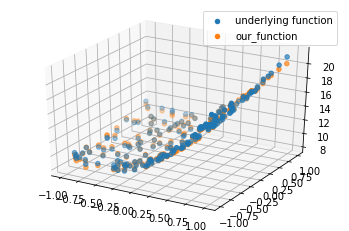

In [44]:
def torch_fit(x: np.ndarray, y_true : np.ndarray, model:Callable, loss: Callable, lr:float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x)
    loss_value = loss(y_pred_tensor, y_true)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.01, num_epochs=1200)
plot_3d(x, y_true, model(x_tensor).detach())

In [28]:
np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1).shape

(5, 1)

## Samething, in Tensorflow/Keras

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 regression (Dense)          (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 2s 6ms/step - loss: 63.9141
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 3.6531
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 4.4531
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3324
Epoch 5/10
7/7 

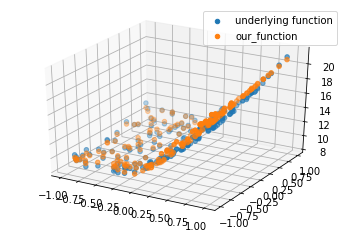

In [45]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))